kaggle competition for house price prediction


In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("housepricetrain.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# sns.countplot(x="SalePrice",data=df)
# plt.show()

In [5]:
df.shape

(1460, 81)

In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
df["LotFrontage"].isnull().sum()

259

In [8]:
df["LotFrontage"]=df["LotFrontage"].fillna(df["LotFrontage"].mean())

In [9]:
df["Street"].isnull().sum()

0

In [10]:
df["Condition2"].isnull().sum()

0

In [11]:
df["YearRemodAdd"].isnull().sum()

0

In [12]:
df["Utilities"].isnull().sum()

0

In [13]:
df["BldgType"].isnull().sum()

0

In [14]:
df["RoofMatl"].isnull().sum()

0

In [15]:
df["Exterior1st"].isnull().sum()

0

In [16]:
df["MasVnrType"].isnull().sum()

8

In [17]:
df["MasVnrType"]=df["MasVnrType"].fillna(df["MasVnrType"].mode()[0])

In [18]:
df["MasVnrArea"].isnull().sum()

8

In [19]:
df["MasVnrArea"]=df["MasVnrArea"].fillna(df["MasVnrArea"].mode()[0])

In [20]:
df["BsmtCond"].isnull().sum()

37

In [21]:
df["BsmtCond"]=df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])

In [22]:
df["BsmtQual"].isnull().sum()

37

In [23]:
df["BsmtQual"]=df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])

In [24]:
df["BsmtExposure"].isnull().sum()

38

In [25]:
df["BsmtExposure"]=df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0])

In [26]:
df["BsmtFinType1"].isnull().sum()

37

In [27]:
df["BsmtFinType1"]=df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0])

In [28]:
df["BsmtFinType2"].isnull().sum()

38

In [29]:
df["BsmtFinType2"]=df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0])

In [30]:
df["Electrical"].isnull().sum()

1

In [31]:
df["Electrical"]=df["Electrical"].fillna(df["Electrical"].mode()[0])

In [32]:
df["FireplaceQu"].isnull().sum()

690

In [33]:
df["FireplaceQu"]=df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0])

In [34]:
df["GarageType"].isnull().sum()

81

In [35]:
df["GarageType"]=df["GarageType"].fillna(df["GarageType"].mode()[0])

In [36]:
df["GarageFinish"].isnull().sum()

81

In [37]:
df["GarageFinish"]=df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])

In [38]:
df["GarageYrBlt"].isnull().sum()

81

In [39]:
df.drop(["GarageYrBlt"],axis=1,inplace=True)

In [40]:
df["GarageQual"].isnull().sum()

81

In [41]:
df["GarageQual"]=df["GarageQual"].fillna(df["GarageQual"].mode()[0])

In [42]:
df["GarageCond"].isnull().sum()

81

In [43]:
df["GarageCond"]=df["GarageCond"].fillna(df["GarageCond"].mode()[0])

In [44]:
df["PoolQC"].isnull().sum()

1453

In [45]:
df["Fence"].isnull().sum()

1179

In [46]:
df["MiscFeature"].isnull().sum()

1406

In [47]:
df["MiscVal"].isnull().sum()

0

In [48]:
df["SalePrice"].isnull().sum()

0

<AxesSubplot:>

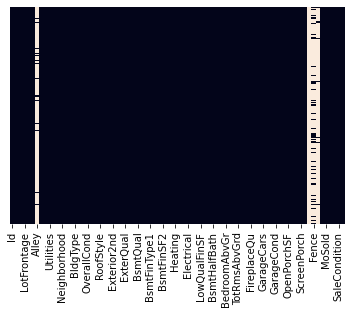

In [49]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [50]:
df.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

<AxesSubplot:>

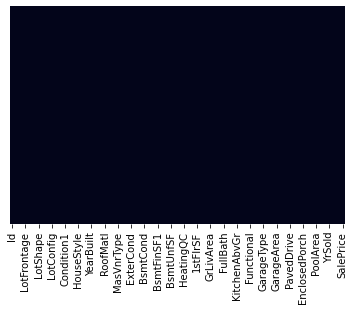

In [51]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [52]:
df.dropna(inplace=True)

In [53]:
df.shape

(1460, 76)

In [54]:
df.drop(["Id"],axis=1,inplace=True) 

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [56]:
df.shape

(1460, 75)

In [57]:
df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

 WITH TEST DATA

In [58]:
test_data=pd.read_csv("test.csv")

In [59]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [60]:
test_data.shape

(1459, 80)

In [61]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [62]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [63]:
test_data["MSZoning"].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [64]:
test_data["LotFrontage"].isnull().sum()

227

In [65]:
test_data["LotFrontage"]=test_data["LotFrontage"].fillna(df["LotFrontage"].mean())

In [66]:
test_data["MSZoning"].isnull().sum()

4

In [67]:
test_data["MSZoning"]=test_data["MSZoning"].fillna(df["MSZoning"].mode()[0])

In [68]:
test_data.shape

(1459, 80)

<AxesSubplot:>

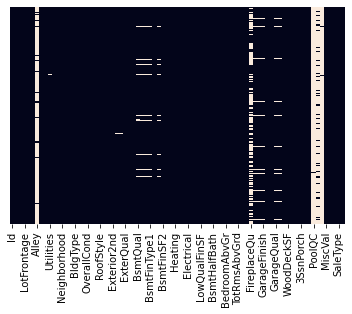

In [69]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False)

In [70]:
test_data.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [71]:
test_data.shape

(1459, 76)

In [72]:
test_data["MasVnrType"].isnull().sum()

16

In [73]:
test_data["MasVnrType"]=test_data["MasVnrType"].fillna(test_data["MasVnrType"].mode()[0])

In [74]:
test_data["MasVnrArea"].isnull().sum()

15

In [75]:
test_data["MasVnrArea"]=test_data["MasVnrArea"].fillna(test_data["MasVnrArea"].mode()[0])

In [76]:
test_data["BsmtCond"].isnull().sum()

45

In [77]:
test_data["BsmtCond"]=test_data["BsmtCond"].fillna(test_data["BsmtCond"].mode()[0])

In [78]:
test_data["BsmtQual"].isnull().sum()

44

In [79]:
test_data["BsmtQual"]=test_data["BsmtQual"].fillna(test_data["BsmtQual"].mode()[0])

In [80]:
test_data["BsmtExposure"].isnull().sum()

44

In [81]:
test_data["BsmtExposure"]=test_data["BsmtExposure"].fillna(test_data["BsmtExposure"].mode()[0])

In [82]:
test_data["BsmtFinType1"].isnull().sum()

42

In [83]:
test_data["BsmtFinType1"]=test_data["BsmtFinType1"].fillna(test_data["BsmtFinType1"].mode()[0])

In [84]:
test_data["BsmtFinType2"].isnull().sum()

42

In [85]:
test_data["BsmtFinType2"]=test_data["BsmtFinType2"].fillna(test_data["BsmtFinType2"].mode()[0])

In [86]:
test_data["Electrical"].isnull().sum()

0

In [87]:
test_data["Utilities"].isnull().sum()

2

In [88]:
test_data["Utilities"]=test_data["Utilities"].fillna(test_data["Utilities"].mode()[0])

In [89]:
test_data["FireplaceQu"].isnull().sum()

730

In [90]:
test_data["FireplaceQu"]=test_data["FireplaceQu"].fillna(test_data["FireplaceQu"].mode()[0])

In [91]:
test_data["GarageType"].isnull().sum()

76

In [92]:
test_data["GarageType"]=test_data["GarageType"].fillna(test_data["GarageType"].mode()[0])

In [93]:
test_data["GarageFinish"].isnull().sum()

78

In [94]:
test_data["GarageFinish"]=df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])

In [95]:
test_data["GarageYrBlt"].isnull().sum()

78

In [96]:
test_data.drop(["GarageYrBlt"],axis=1,inplace=True)

In [97]:
test_data["GarageArea"].isnull().sum()

1

In [98]:
test_data["GarageArea"]=df["GarageArea"].fillna(df["GarageArea"].mode()[0])

In [99]:
test_data["GarageQual"].isnull().sum()

78

In [100]:
test_data["GarageQual"]=test_data["GarageQual"].fillna(test_data["GarageQual"].mode()[0])

In [101]:
test_data["GarageCond"].isnull().sum()

78

In [102]:
test_data["GarageCond"]=test_data["GarageCond"].fillna(test_data["GarageCond"].mode()[0])

In [103]:
test_data["Exterior1st"].isnull().sum()

1

In [104]:
test_data["Exterior1st"]=test_data["Exterior1st"].fillna(test_data["Exterior1st"].mode()[0])

In [105]:
test_data["Exterior2nd"].isnull().sum()

1

In [106]:
test_data["Exterior2nd"]=test_data["Exterior2nd"].fillna(test_data["Exterior2nd"].mode()[0])

In [107]:
test_data["BsmtFinSF1"].isnull().sum()

1

In [108]:
test_data["BsmtFinSF1"]=test_data["BsmtFinSF1"].fillna(test_data["BsmtFinSF1"].mode()[0])

In [109]:
test_data["BsmtFinSF2"].isnull().sum()

1

In [110]:
test_data["BsmtFinSF2"]=test_data["BsmtFinSF2"].fillna(test_data["BsmtFinSF2"].mode()[0])

In [111]:
test_data["BsmtUnfSF"].isnull().sum()

1

In [112]:
test_data["BsmtUnfSF"]=test_data["BsmtUnfSF"].fillna(test_data["BsmtUnfSF"].mode()[0])

In [113]:
test_data["TotalBsmtSF"].isnull().sum()

1

In [114]:
test_data["TotalBsmtSF"]=test_data["TotalBsmtSF"].fillna(test_data["TotalBsmtSF"].mode()[0])

In [115]:
test_data["SaleType"].isnull().sum()

1

In [116]:
test_data["SaleType"]=test_data["SaleType"].fillna(test_data["SaleType"].mode()[0])

In [117]:
test_data["BsmtFullBath"].isnull().sum()

2

In [118]:
test_data["BsmtFullBath"]=test_data["BsmtFullBath"].fillna(test_data["BsmtFullBath"].mode()[0])

In [119]:
test_data["BsmtHalfBath"].isnull().sum()

2

In [120]:
test_data["BsmtHalfBath"]=test_data["BsmtHalfBath"].fillna(test_data["BsmtHalfBath"].mode()[0])

In [121]:
test_data["KitchenQual"].isnull().sum()

1

In [122]:
test_data["KitchenQual"]=test_data["KitchenQual"].fillna(test_data["KitchenQual"].mode()[0])

In [123]:
test_data["Functional"].isnull().sum()

2

In [124]:
test_data["Functional"]=test_data["Functional"].fillna(test_data["Functional"].mode()[0])

In [125]:
test_data["GarageCars"].isnull().sum()

1

In [126]:
test_data["GarageCars"]=test_data["GarageCars"].fillna(test_data["GarageCars"].mode()[0])

<AxesSubplot:>

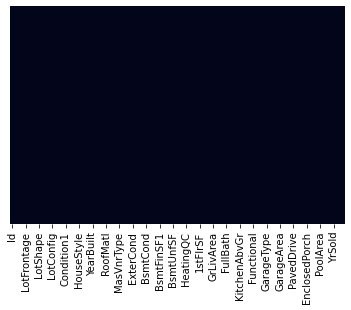

In [127]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False)

In [128]:
test_data.drop(["Id"],axis=1,inplace=True)

In [129]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [130]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [131]:
test_data.shape

(1459, 74)

In [132]:
test_data.to_csv("newtest.csv",index=False)

In [133]:
columns=['MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC',
       'CentralAir', 'Electrical',
       'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition']

In [134]:
len(columns)

39

handling catogorical features

In [135]:
def catogory_onehot_multicols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final
            
        

In [136]:
main_df=df.copy()

In [137]:
test_datanew=pd.read_csv("newtest.csv")

In [138]:
test_datanew.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [139]:
test_datanew.shape

(1459, 74)

In [140]:
final_df=pd.concat([df,test_datanew],axis=0)

In [141]:
final_df.shape

(2919, 75)

In [142]:
final_df=catogory_onehot_multicols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [143]:
final_df.shape

(2919, 236)

In [144]:
final_df=final_df.loc[:,~final_df.columns.duplicated()]

In [145]:
final_df.shape

(2919, 176)

In [146]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [147]:
df_train=final_df.iloc[:1422,:]
df_test=final_df.iloc[1422:,:]

In [148]:
df_test.drop(["SalePrice"],axis=1,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_7944\4021866884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(["SalePrice"],axis=1,inplace=True)


In [149]:
df_test.shape

(1497, 175)

In [150]:
xtrain=df_train.drop(["SalePrice"],axis=1)
ytrain=df_train["SalePrice"]

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
model=RandomForestClassifier(n_estimators=100)

In [153]:
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [154]:
import pickle
filename="final_houseprice_prediction.pkl"
pickle.dump(model,open(filename,'wb'))

In [155]:
prediction=model.predict(df_test)

In [156]:
prediction

array([140000., 181000., 139400., ..., 149900.,  93500., 187500.])

In [157]:
sample_sub=pd.read_csv("sample_submission.csv")

In [159]:
output = pd.DataFrame({'Id': sample_sub.Id, 'SalePrice': prediction})
output.to_csv('sample_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
# datasets=pd.concat([sample_sub["Id"],predict],axis=1)

In [ ]:
# datasets.columns=['Id','SalePrice']

In [ ]:
# datasets.to_csv('sample_submission.csv',index=None)